# Steps Analysis (02/17/17 - 10/24/18)

In [16]:
from main_clean_functions import main_clean_function
from common_cleaning_functions import print_remaining
from common_cleaning_functions import print_all_info
from main_clean_functions import create_combined_daily_df
import numpy as np

HKQuantityTypeIdentifierFlightsClimbed
HKQuantityTypeIdentifierDistanceWalkingRunning

In [17]:
steps_df, dist_df = main_clean_function('../data/export.xml')

In [4]:
steps_df.num_steps.sum()

4316358.0

In [5]:
dist_df.tot_dist.sum()

1801.57972793795

In [ ]:
combined_df = create_combined_daily_df(stp_df, dst_df)

In [72]:
combined_df = merge_steps_and_distance(daily_steps_df, daily_dist_df)
combined_df.loc[:, 'stp_per_ft'] = combined_df.tot_dist*5280/combined_df.num_steps
combined_df.reset_index(inplace=True)
var_df = combined_df.groupby(combined_df['start_date'].dt.strftime('%b%y'), sort=False).var()
mean_df = combined_df.groupby(combined_df['start_date'].dt.strftime('%b%y'), sort=False).mean()
var_mean_df = pd.concat([var_df, mean_df], axis=1)
var_mean_df.columns=['var_steps', 'var_dist', 'var_spf', 'mean_steps', 'mean_dist', 'mean_spf']
var_mean_df.loc[:, 'var_mean_score'] = var_mean_df['var_steps']/var_mean_df['mean_steps']
var_mean_df.sort_values(by='var_mean_score')

,var_steps,var_dist,var_spf,mean_steps,mean_dist,mean_spf,var_mean_score
start_date,,,,,,,
Dec17,3.448560e+06,0.777522,0.009887,9789.612903,4.214029,2.267581,352.267273
Aug18,3.408619e+06,0.564303,0.004678,8313.967742,3.245853,2.054079,409.987057
Mar17,1.342440e+06,0.225279,0.005858,3263.129032,1.300046,2.096349,411.396659
Oct17,3.232270e+06,0.611089,0.009876,7442.451613,3.134326,2.224607,434.301790
Mar18,4.080464e+06,0.693593,0.008623,9145.000000,3.911817,2.263250,446.196202
Nov17,4.002895e+06,0.712416,0.004072,7710.700000,3.164678,2.163578,519.135050
Feb17,1.470816e+06,0.238904,0.006163,2813.666667,1.151130,2.168382,522.739852
Apr17,2.457568e+06,0.403621,0.002142,3880.266667,1.536547,2.083054,633.350213
Jan18,5.460999e+06,0.981224,0.008835,8087.806452,3.473175,2.269002,675.213862


In [75]:
combined_df = merge_steps_and_distance(daily_steps_df, daily_dist_df)
combined_df.loc[:, 'stp_per_ft'] = combined_df.tot_dist*5280/combined_df.num_steps
combined_df.reset_index(inplace=True)
std_df = combined_df.groupby(combined_df['start_date'].dt.strftime('%b%y'), sort=False).std()
mean_df = combined_df.groupby(combined_df['start_date'].dt.strftime('%b%y'), sort=False).mean()
std_mean_df = pd.concat([std_df, mean_df], axis=1)
std_mean_df.columns=['std_steps', 'std_dist', 'std_spf', 'mean_steps', 'mean_dist', 'mean_spf']
std_mean_df.loc[:, 'std_mean_score'] = std_mean_df['mean_steps']/std_mean_df['std_steps']
std_mean_df.sort_values(by='std_mean_score', ascending=False).round(3)

,std_steps,std_dist,std_spf,mean_steps,mean_dist,mean_spf,std_mean_score
start_date,,,,,,,
Dec17,1857.030,0.882,0.099,9789.613,4.214,2.268,5.272
Mar18,2020.016,0.833,0.093,9145.000,3.912,2.263,4.527
Aug18,1846.245,0.751,0.068,8313.968,3.246,2.054,4.503
Oct17,1797.852,0.782,0.099,7442.452,3.134,2.225,4.140
Nov17,2000.724,0.844,0.064,7710.700,3.165,2.164,3.854
Jan18,2336.878,0.991,0.094,8087.806,3.473,2.269,3.461
Feb18,2816.109,1.189,0.061,8766.607,3.783,2.286,3.113
Oct18,3060.807,1.222,0.099,9325.542,3.579,2.021,3.047
Sep18,2788.597,1.130,0.085,8170.900,3.115,2.001,2.930


In [99]:
combined_df = merge_steps_and_distance(daily_steps_df, daily_dist_df)
combined_df.loc[:, 'stp_per_ft'] = combined_df.tot_dist*5280/combined_df.num_steps
combined_df.reset_index(inplace=True)
std_df = combined_df.groupby(combined_df['start_date'].dt.strftime('%d%y'), sort=False).std()
mean_df = combined_df.groupby(combined_df['start_date'].dt.strftime('%d%y'), sort=False).mean()
std_mean_df = pd.concat([std_df, mean_df], axis=1)
std_mean_df.columns=['std_steps', 'std_dist', 'std_spf', 'mean_steps', 'mean_dist', 'mean_spf']
std_mean_df.loc[:, 'std_mean_score'] = std_mean_df['mean_steps']/std_mean_df['std_steps']
# std_mean_df.sort_values(by='std_mean_score', ascending=False)
smdmsmt = int(std_mean_df.mean_steps.max()*.01)
std_mean_df[std_mean_df.mean_steps>=smdmsmt].sort_values(by='std_mean_score', ascending=False)

,std_steps,std_dist,std_spf,mean_steps,mean_dist,mean_spf,std_mean_score
start_date,,,,,,,
1518,1114.741704,0.485932,0.153675,8501.800000,3.591370,2.233617,7.626700
2318,1781.974997,0.668443,0.188725,9190.000000,3.827518,2.216031,5.157199
2518,1797.198870,0.884646,0.118577,9065.444444,3.862259,2.240310,5.044208
1918,1897.239459,0.860171,0.162531,9238.700000,3.909416,2.237065,4.869549
0518,1810.344378,0.812320,0.173440,8480.900000,3.531172,2.191788,4.684689
2818,2438.330941,1.046542,0.136411,10783.444444,4.506958,2.207367,4.422470
2118,2392.211520,0.843708,0.124093,10107.200000,4.237922,2.230699,4.225044
1618,2316.262816,1.087112,0.124523,9692.900000,4.135484,2.244177,4.184715
2418,2123.919357,0.982870,0.166495,8696.100000,3.597364,2.173640,4.094364


In [87]:
combined_df = merge_steps_and_distance(daily_steps_df, daily_dist_df)
combined_df.loc[:, 'stp_per_ft'] = combined_df.tot_dist*5280/combined_df.num_steps
combined_df.reset_index(inplace=True)
var_df = combined_df.groupby(combined_df['start_date'].dt.strftime('%U%y'), sort=False).var()
mean_df = combined_df.groupby(combined_df['start_date'].dt.strftime('%U%y'), sort=False).mean()
var_mean_df = pd.concat([var_df, mean_df], axis=1)
var_mean_df.columns=['var_steps', 'var_dist', 'var_spf', 'mean_steps', 'mean_dist', 'mean_spf']
var_mean_df.loc[:, 'var_mean_score'] = var_mean_df['var_dist']/var_mean_df['mean_dist']
var_mean_df.sort_values(by='var_mean_score')

,var_steps,var_dist,var_spf,mean_steps,mean_dist,mean_spf,var_mean_score
start_date,,,,,,,
3318,8.566826e+05,0.130462,0.001657,8947.285714,3.531988,2.084836,0.036937
1818,5.104691e+05,0.097994,0.010308,6164.857143,2.624066,2.248597,0.037344
2418,6.545632e+05,0.154974,0.004187,6615.285714,3.010272,2.401518,0.051482
4217,9.558876e+05,0.202814,0.014245,8046.428571,3.382775,2.219473,0.059955
4917,1.672876e+06,0.295173,0.003288,9912.857143,4.079011,2.173015,0.072364
1518,1.425504e+06,0.280033,0.002478,8479.142857,3.642580,2.267920,0.076878
0917,6.268678e+05,0.086341,0.003830,2623.142857,1.043923,2.113928,0.082708
3817,2.241597e+06,0.321684,0.004517,8848.428571,3.753651,2.247086,0.085699
3218,1.628412e+06,0.302227,0.007960,8843.142857,3.452179,2.058416,0.087547


,var_steps,var_dist,var_spf,mean_steps,mean_dist,mean_spf,var_mean_score
start_date,,,,,,,
Dec17,3.448560e+06,0.777522,0.009887,9789.612903,4.214029,2.267581,352.267273
Aug18,3.408619e+06,0.564303,0.004678,8313.967742,3.245853,2.054079,409.987057
Mar17,1.342440e+06,0.225279,0.005858,3263.129032,1.300046,2.096349,411.396659
Oct17,3.232270e+06,0.611089,0.009876,7442.451613,3.134326,2.224607,434.301790
Mar18,4.080464e+06,0.693593,0.008623,9145.000000,3.911817,2.263250,446.196202
Nov17,4.002895e+06,0.712416,0.004072,7710.700000,3.164678,2.163578,519.135050
Feb17,1.470816e+06,0.238904,0.006163,2813.666667,1.151130,2.168382,522.739852
Apr17,2.457568e+06,0.403621,0.002142,3880.266667,1.536547,2.083054,633.350213
Jan18,5.460999e+06,0.981224,0.008835,8087.806452,3.473175,2.269002,675.213862


In [257]:
summed_df = create_daily_steps_df(df)

In [219]:
summed_df.head()

,start_date,end_date,num_steps
0,2017-02-17,2017-02-17,812.0
1,2017-02-18,2017-02-18,2668.0
2,2017-02-19,2017-02-19,2991.0
3,2017-02-20,2017-02-20,2812.0
4,2017-02-21,2017-02-21,2819.0


In [230]:
roll_trenta = rolling_day_df(summed_df, 7)
summed_df.reset_index(inplace=True)
# summed_df.drop(columns=['index'], inplace=True)

In [231]:
roll_trenta.sort_values(by='total_num_steps', ascending=False)

,key_0_x,key_0_x,mean_num_steps,median_num_steps,std_num_steps,total_num_steps,min_num_steps,max_num_steps,steps_score_mean,steps_score_median
512,512,"(2018-07-14 00:00:00, 2018-07-21 00:00:00)",12403.571429,10919.0,2587.089733,86825.0,9364.0,15895.0,4.794411,4.220573
127,127,"(2017-06-23 00:00:00, 2017-06-30 00:00:00)",12276.000000,10020.0,5170.406754,85932.0,6972.0,19457.0,2.374281,1.937952
128,128,"(2017-06-24 00:00:00, 2017-07-01 00:00:00)",12181.714286,10020.0,5287.931029,85272.0,6312.0,19457.0,2.303683,1.894881
463,463,"(2018-05-26 00:00:00, 2018-06-02 00:00:00)",11831.714286,13561.0,4351.390342,82822.0,4791.0,16422.0,2.719065,3.116475
126,126,"(2017-06-22 00:00:00, 2017-06-29 00:00:00)",11706.428571,10020.0,5876.333745,81945.0,4130.0,19457.0,1.992131,1.705145
511,511,"(2018-07-13 00:00:00, 2018-07-20 00:00:00)",11489.714286,10919.0,4361.233416,80428.0,2967.0,15895.0,2.634510,2.503650
129,129,"(2017-06-25 00:00:00, 2017-07-02 00:00:00)",11465.142857,8265.0,5930.507832,80256.0,5004.0,19457.0,1.933248,1.393641
607,607,"(2018-10-17 00:00:00, 2018-10-24 00:00:00)",11393.285714,9910.0,2984.477940,79753.0,8396.0,15580.0,3.817514,3.320514
461,461,"(2018-05-24 00:00:00, 2018-05-31 00:00:00)",11345.285714,12791.0,4091.661183,79417.0,4791.0,16422.0,2.772782,3.126114
605,605,"(2018-10-15 00:00:00, 2018-10-22 00:00:00)",11297.714286,9910.0,3567.078857,79084.0,6578.0,15580.0,3.167217,2.778184


In [232]:
summed_df.reset_index(inplace=True)
summed_df.drop(columns=['index'], inplace=True)
summed_df.groupby(summed_df['start_date'].dt.strftime('%b%y'), sort=False).mean()

,num_steps
start_date,
Feb17,2813.666667
Mar17,3263.129032
Apr17,3880.266667
May17,3285.774194
Jun17,6418.233333
Jul17,5750.516129
Aug17,4210.096774
Sep17,5991.379310
Oct17,7442.451613


In [233]:
summed_df

,start_date,end_date,num_steps
0,2017-02-17,2017-02-17,812.0
1,2017-02-18,2017-02-18,2668.0
2,2017-02-19,2017-02-19,2991.0
3,2017-02-20,2017-02-20,2812.0
4,2017-02-21,2017-02-21,2819.0
5,2017-02-22,2017-02-22,2559.0
6,2017-02-23,2017-02-23,4396.0
7,2017-02-24,2017-02-24,3060.0
8,2017-02-25,2017-02-25,5439.0
9,2017-02-26,2017-02-26,1592.0


In [234]:
summed_df.num_steps.std()

3417.714769297332

In [235]:
print_remainder(df)

Total Rows = 24900
Total Steps = 4316358.0
start_date != end_date: 0


In [236]:
X = summed_df.start_date.values
y = df.num_steps.values
type(y)

numpy.ndarray

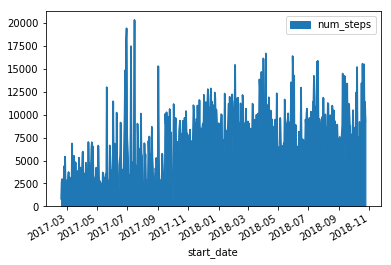

In [237]:
summed_df.plot(x='start_date', y='num_steps', kind='area')